<a href="https://colab.research.google.com/github/jelade/Jaleel/blob/master/House_price_predicction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats


In [37]:
training = pd.read_csv('/content/msc_training_dataset.csv')
testing = pd.read_csv('/content/msc_testing_dataset.csv')

In [38]:
training.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [39]:
training.iloc[:,:-1].nunique()

room            5
bathroom        2
kitchen         2
french_door     3
backyard        2
furnished       2
green_paint     2
solar_power     2
woodfloor       2
qlm_security    2
club_access     2
dtype: int64

In [40]:
X_ = training.iloc[:,:-1]

y = training["price"]

In [41]:
model = LinearRegression().fit(X_, y)

In [42]:
y_pred = model.predict(X_)

In [43]:
testing.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [44]:
X_test = testing.iloc[:,:-1]

y_test = testing["price"]

In [45]:
ypred = model.predict(X_test)


print("Root mean Squared Error",mean_squared_error(y_test,ypred)**0.5)

print(r2_score(y_test,ypred))



Root mean Squared Error 13.000000000000467
0.9999656095212318


In [46]:
model.coef_

array([1000.,  300.,  500.,  240.,  560., 2000.,  370., 1530., 1890.,
        440.,  730.])

In [47]:
# Get the coefficients (importance) of the features
feature_importance = model.coef_.ravel()

# Convert the coefficients to absolute values and sort in descending order
absolute_feature_importance = np.abs(feature_importance)
sorted_idx = np.argsort(absolute_feature_importance)[::-1]

col = []
# Print the feature names and their corresponding importance scores
for i in sorted_idx:
  col.append(X_.columns[i])
  print('Feature: %s, Importance: %.3f' % (X_.columns[i], absolute_feature_importance[i]))

Feature: furnished, Importance: 2000.000
Feature: woodfloor, Importance: 1890.000
Feature: solar_power, Importance: 1530.000
Feature: room, Importance: 1000.000
Feature: club_access, Importance: 730.000
Feature: backyard, Importance: 560.000
Feature: kitchen, Importance: 500.000
Feature: qlm_security, Importance: 440.000
Feature: green_paint, Importance: 370.000
Feature: bathroom, Importance: 300.000
Feature: french_door, Importance: 240.000


In [48]:
sort_ = np.sort(absolute_feature_importance)
col
sort_ 

array([ 240.,  300.,  370.,  440.,  500.,  560.,  730., 1000., 1530.,
       1890., 2000.])

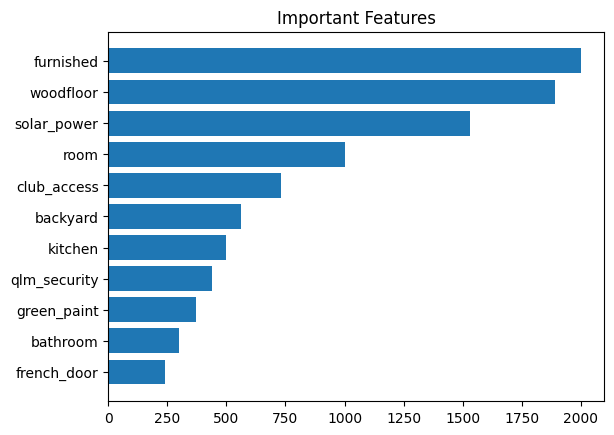

In [49]:
plt.barh(col[::-1],sort_)
plt.title("Important Features")
plt.show()

#Another Library to get the p-value

In [50]:
X2 = sm.add_constant(X_)

model2 = sm.OLS(y,X2)

In [51]:
model_fit  = model2.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.142e+30
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        12:45:53   Log-Likelihood:                 68042.
No. Observations:                3000   AIC:                        -1.361e+05
Df Residuals:                    2988   BIC:                        -1.360e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          195.0000    3.8e-12   5.14e+13   

In [52]:
t_value = model_fit.tvalues.sort_values(ascending=False)

In [53]:
t_value

room            2.275854e+15
furnished       1.597486e+15
woodfloor       1.510231e+15
solar_power     1.222612e+15
club_access     5.829885e+14
backyard        4.476104e+14
kitchen         3.990791e+14
qlm_security    3.510575e+14
french_door     3.117821e+14
green_paint     2.952641e+14
bathroom        2.394388e+14
const           5.135108e+13
dtype: float64

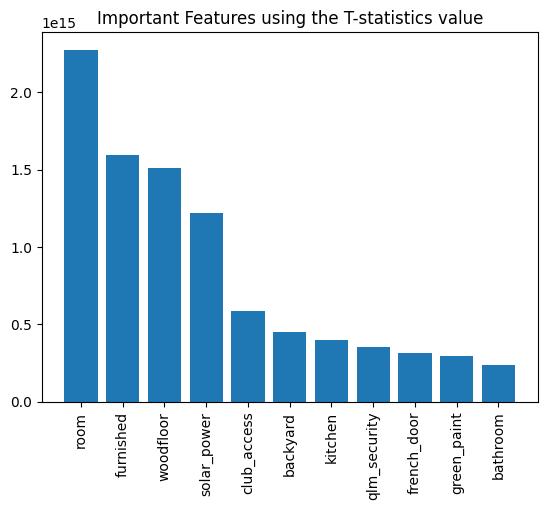

In [54]:
plt.bar(t_value.index[:-1],t_value[:-1])
plt.title("Important Features using the T-statistics value")
plt.xticks(rotation=90)
plt.show()

In [55]:
X_new = sm.add_constant(X_.iloc[:,1:]) #To check the extent at which Room variable is important

model_new = sm.OLS(y,X_new).fit()

In [56]:
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     426.2
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        12:46:03   Log-Likelihood:                -26038.
No. Observations:                3000   AIC:                         5.210e+04
Df Residuals:                    2989   BIC:                         5.216e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3018.1104    149.404     20.201   

In [57]:
X_cons = X_.copy()

X_["cons"] = 1

In [58]:
columns = ['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access']

In [59]:
#room = X_[['bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       #'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
      # 'club_access']]

#bath = X_[['room', 'kitchen', 'french_door', 'backyard', 'furnished', 'green_paint', 'solar_power', 'woodfloor', 'qlm_security', 'club_access']]


In [60]:
room = X_.drop('room', axis=1)
bathroom = X_.drop('bathroom', axis=1)
kitchen = X_.drop('kitchen', axis=1)
french_door = X_.drop('french_door', axis=1)
backyard = X_.drop('backyard', axis=1)
furnished = X_.drop('furnished', axis=1)
green_paint = X_.drop('green_paint', axis=1)
solar_power = X_.drop('solar_power', axis=1)
woodfloor = X_.drop('woodfloor', axis=1)
qlm_security = X_.drop('qlm_security', axis=1)
club_access = X_.drop('club_access', axis=1)

In [63]:
 #To check the extent at which Room variable is important

model_room = sm.OLS(y,room).fit()
model_broom = sm.OLS(y,bathroom).fit()
model_kit = sm.OLS(y,kitchen).fit()
model_fdoor = sm.OLS(y,french_door).fit()
model_backyard = sm.OLS(y,backyard).fit()
model_furnished = sm.OLS(y,furnished).fit()
model_green_paint = sm.OLS(y,green_paint).fit()
model_solar_power = sm.OLS(y,solar_power).fit()
model_woodfloor = sm.OLS(y,woodfloor).fit()
model_qlm_security = sm.OLS(y,qlm_security).fit()
model_club_access = sm.OLS(y,club_access).fit()



In [65]:
from statsmodels.iolib.summary2 import summary_col
res = summary_col([model_fit,model_room,model_broom,model_kit,model_fdoor,model_backyard,model_furnished,model_green_paint,model_solar_power,model_woodfloor,model_qlm_security,model_club_access], regressor_order=model_fit.params.index.tolist())
print(res)


                price I   price II  price III price IIII price IIIII price IIIIII price IIIIIII price IIIIIIII price IIIIIIIII price IIIIIIIIII price IIIIIIIIIII price IIIIIIIIIIII
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const          195.0000                                                                                                                                                             
               (0.0000)                                                                                                                                                             
room           1000.0000            1001.6715 1003.9679  1001.3628   1000.1248    1002.9396     997.9348       997.0107        1008.9802        996.2686          1000.5366         
               (0.0000)             (1.9241)  (3.2066)   (2.5057)    (3.5974)     (12.8388)   

In [67]:
res.tables[0].to_csv("test.csv")
table  = pd.read_csv("test.csv")

In [89]:
new = table.iloc[27,:]

In [90]:
new.index =  ["lab",'full','room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access']

In [107]:
sort = pd.Series(new[2:].sort_values(ascending = False), dtype = float)

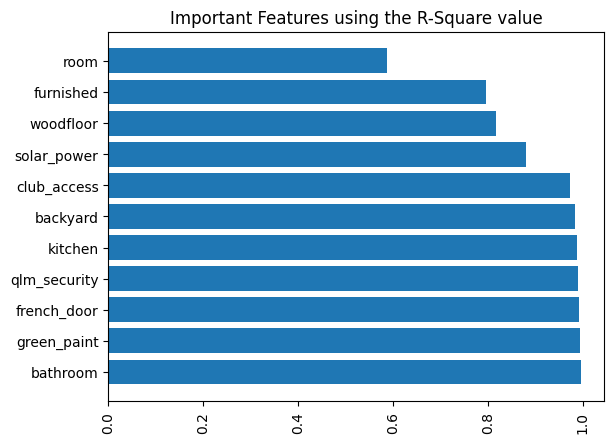

In [109]:
plt.barh(sort.index,sort.values)
plt.title("Important Features using the R-Square value")
plt.xticks(rotation=90)
plt.show()